# Project 9: Python & PostgreSQL, Tuukka Lukkari

## Part 1: Establishing a connection with PostgreSQL and importing price data related to AMD directly from Jupyter Notebook to pdAdmin4

In [1]:
import psycopg2

In [ ]:
pgconn = psycopg2.connect(
    host = "localhost",
    user = "postgres",
    password = "REMOVED due to privacy reasons"
)

In [3]:
pgcursor = pgconn.cursor()

In [4]:
from psycopg2.extensions import ISOLATION_LEVEL_AUTOCOMMIT
pgconn.set_isolation_level(ISOLATION_LEVEL_AUTOCOMMIT)

In [14]:
# Creating a database in which we will import a table from FACTSET using pandas as per instructions

In [11]:
pgcursor.execute('CREATE DATABASE assignment9')

In [5]:
pgconn.close()

In [ ]:
pgconn = psycopg2.connect(
    host = "localhost",
    database = "assignment9",
    user = "postgres",
    password = "REMOVED"  
)

In [21]:
import pandas as pd

factset_df = pd.read_excel("amd_income_statements.xlsx")
factset_df.head(5)

,Income Statements of AMD,Sales,Cost of Goods Sold (COGS) incl. D&A,COGS excluding D&A,Depreciation & Amortization Expense,Depreciation,Amortization of Intangibles,Gross Income,SG&A Expense,Research & Development,...,Basic Shares Outstanding,Total Shares Outstanding,EPS (diluted),Diluted Shares Outstanding,Total Shares Outstanding.1,Earnings Persistence,EBITDA,EBITDA.1,EBIT,Depreciation & Amortization Expense.1
0,JUN '24,21527.260627,12788.832225,9758.200100,3030.632125,700.122237,2330.509888,8738.428402,7864.251891,5665.763462,...,1618,1618,0.7696,1637,1618,0.000,0,3904.80864,874.17651,3030.632125
1,DEC '23,20978.329761,13031.908642,9747.338581,3284.570061,684.478132,2600.091929,7946.421119,7368.314589,5431.426471,...,1614,1616,0.4861,1625,1616,93.127,0,3862.67659,578.10653,3284.570061
2,DEC '22,22456.305044,14365.717281,10310.432671,4055.284611,501.439463,3553.845148,8090.587763,6554.869940,4762.247648,...,1561,1612,0.7995,1571,1612,52.380,0,5591.00243,1535.71782,4055.284611
3,DEC '21,13903.777452,7195.547477,6803.832194,391.715283,297.805140,93.910143,6708.229976,3596.504682,2406.976199,...,1213,1207,2.1767,1229,1207,84.620,0,3503.44057,3111.72529,391.715283
4,DEC '20,8564.227040,4750.983678,4440.450402,310.533276,227.198075,83.335201,3813.243362,2600.058276,1739.512672,...,1184,1211,1.8104,1207,1211,57.663,0,1523.71837,1213.18509,310.533276


In [22]:
factset_df.shape

(11, 49)

In [23]:
from sqlalchemy import create_engine

In [ ]:
# Establishing connection
engine = create_engine('REMOVED due to privacy reasons')

In [25]:
# Saving the created table to a PostgreSQL table

factset_df.to_sql('amd_is', engine, if_exists = 'replace', index = False)

11

In [26]:
# A outstandingly efficient way to import data of large tables
# Importin it chunk by chunk
# for chunk in pd.read_csv("filename.csv", chunksize = 2000):
    # chunk.to_sql("table_name", engine, if_exists = "append")

In [27]:
# Note to myself: name tables in lowercase. Otherwise you have to refer to them using ""

In [28]:
# Writing SQL querys with Python
pd.read_sql_query('''
select*
from amd_is
limit 5
''', engine)

,Income Statements of AMD,Sales,Cost of Goods Sold (COGS) incl. D&A,COGS excluding D&A,Depreciation & Amortization Expense,Depreciation,Amortization of Intangibles,Gross Income,SG&A Expense,Research & Development,...,Basic Shares Outstanding,Total Shares Outstanding,EPS (diluted),Diluted Shares Outstanding,Total Shares Outstanding.1,Earnings Persistence,EBITDA,EBITDA.1,EBIT,Depreciation & Amortization Expense.1
0,JUN '24,21527.260627,12788.832225,9758.200100,3030.632125,700.122237,2330.509888,8738.428402,7864.251891,5665.763462,...,1618,1618,0.7696,1637,1618,0.000,0,3904.80864,874.17651,3030.632125
1,DEC '23,20978.329761,13031.908642,9747.338581,3284.570061,684.478132,2600.091929,7946.421119,7368.314589,5431.426471,...,1614,1616,0.4861,1625,1616,93.127,0,3862.67659,578.10653,3284.570061
2,DEC '22,22456.305044,14365.717281,10310.432671,4055.284611,501.439463,3553.845148,8090.587763,6554.869940,4762.247648,...,1561,1612,0.7995,1571,1612,52.380,0,5591.00243,1535.71782,4055.284611
3,DEC '21,13903.777452,7195.547477,6803.832194,391.715283,297.805140,93.910143,6708.229976,3596.504682,2406.976199,...,1213,1207,2.1767,1229,1207,84.620,0,3503.44057,3111.72529,391.715283
4,DEC '20,8564.227040,4750.983678,4440.450402,310.533276,227.198075,83.335201,3813.243362,2600.058276,1739.512672,...,1184,1211,1.8104,1207,1211,57.663,0,1523.71837,1213.18509,310.533276


In [30]:
pd.read_sql_query('''
select ordinal_position, column_name, data_type
from information_schema.columns
where table_name = 'amd_is'
''', engine)

,ordinal_position,column_name,data_type
0,49,Depreciation & Amortization Expense.1,double precision
1,2,Sales,double precision
2,3,Cost of Goods Sold (COGS) incl. D&A,double precision
3,4,COGS excluding D&A,double precision
4,5,Depreciation & Amortization Expense,double precision
5,6,Depreciation,double precision
6,7,Amortization of Intangibles,double precision
7,8,Gross Income,double precision
8,9,SG&A Expense,double precision
9,10,Research & Development,double precision


In [31]:
pgconn = engine.connect()

In [32]:
# The sql query can be implemented in everything in python.
# Below is a defined function for showing the columns
def get_columns(tablename):
    return pd.read_sql_query('''
        select ordinal_position, column_name, data_type
        from information_schema.columns
        where table_name = '{}'
        ''' .format(tablename), engine)

In [33]:
get_columns('amd_is')

,ordinal_position,column_name,data_type
0,49,Depreciation & Amortization Expense.1,double precision
1,2,Sales,double precision
2,3,Cost of Goods Sold (COGS) incl. D&A,double precision
3,4,COGS excluding D&A,double precision
4,5,Depreciation & Amortization Expense,double precision
5,6,Depreciation,double precision
6,7,Amortization of Intangibles,double precision
7,8,Gross Income,double precision
8,9,SG&A Expense,double precision
9,10,Research & Development,double precision


In [110]:
pgconn.close()
engine.dispose()

## Part 2: Performing querys and visualizations

In [47]:
# Constructing a table using SQL in Python
sales_cogs = pd.read_sql_query('''
select "Sales", "Cost of Goods Sold (COGS) incl. D&A", "Income Statements of AMD"
from amd_is
order by "Income Statements of AMD" asc
''', engine)
sales_cogs

,Sales,Cost of Goods Sold (COGS) incl. D&A,Income Statements of AMD
0,4150.944801,2775.086781,DEC '14
1,3598.994740,2624.173062,DEC '15
2,3861.879021,2959.689118,DEC '16
3,4657.184964,3072.873232,DEC '17
4,5488.452262,3414.283507,DEC '18
5,6013.855827,3450.529075,DEC '19
6,8564.227040,4750.983678,DEC '20
7,13903.777452,7195.547477,DEC '21
8,22456.305044,14365.717281,DEC '22
9,20978.329761,13031.908642,DEC '23


In [120]:
import pandas as pd
sales_cogs.to_excel("assignm9_1.xlsx", index=False)

In [48]:
import matplotlib.pyplot as plt

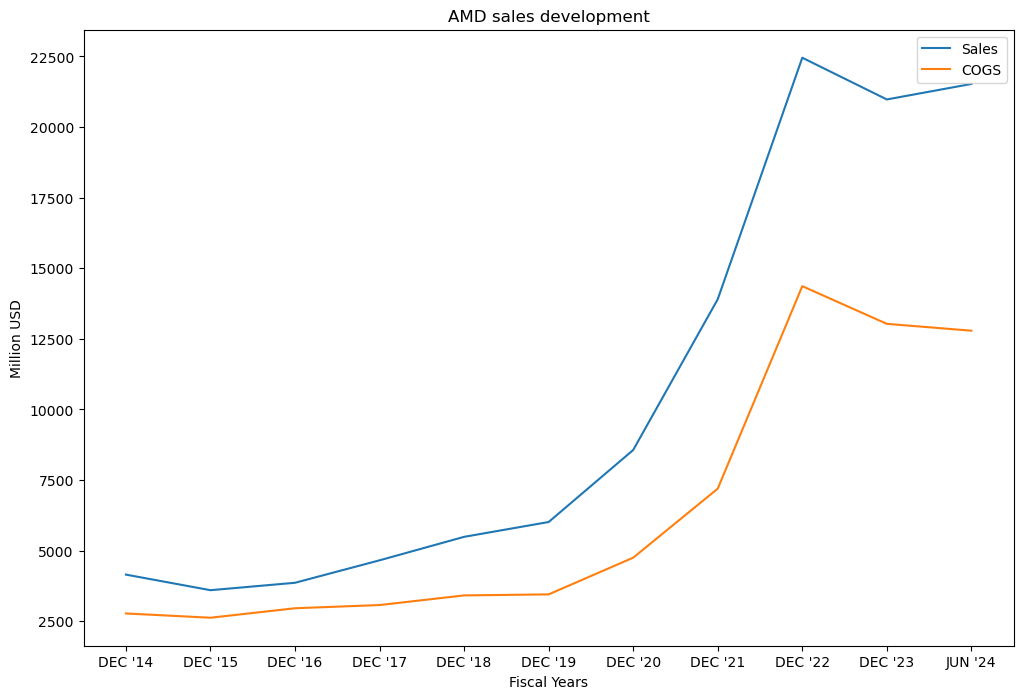

In [57]:
# Displaying 1.
plt.figure(figsize=(12,8))
plt.plot(sales_cogs['Income Statements of AMD'], sales_cogs['Sales'], label = 'Sales')
plt.plot(sales_cogs['Cost of Goods Sold (COGS) incl. D&A'], label = 'COGS')
plt.axis('tight')
plt.xlabel('Fiscal Years')
plt.ylabel('Million USD')
plt.title('AMD sales development')
plt.legend()
plt.show()

In [67]:
profit_margins = pd.read_sql_query('''
select "Net Income", "Gross Income", "Income Statements of AMD" as "Year", "Sales"
, ("Gross Income"/"Sales") as gross_profit_margin
, ("Net Income"/"Sales") as net_profit_margin
from amd_is
order by "Income Statements of AMD" asc
''', engine)
profit_margins

,Net Income,Gross Income,Year,Sales,gross_profit_margin,net_profit_margin
0,-303.819607,1375.858021,DEC '14,4150.944801,0.331457,-0.073193
1,-595.173272,974.821677,DEC '15,3598.994740,0.270859,-0.165372
2,-449.286955,902.189902,DEC '16,3861.879021,0.233614,-0.116339
3,-29.257016,1584.311732,DEC '17,4657.184964,0.340187,-0.006282
4,285.653809,2074.168754,DEC '18,5488.452262,0.377915,0.052046
5,304.668673,2563.326752,DEC '19,6013.855827,0.426237,0.050661
6,2184.259483,3813.243362,DEC '20,8564.227040,0.445252,0.255045
7,2675.170032,6708.229976,DEC '21,13903.777452,0.482475,0.192406
8,1255.977402,8090.587763,DEC '22,22456.305044,0.360281,0.055930
9,789.924763,7946.421119,DEC '23,20978.329761,0.378792,0.037654


In [121]:
profit_margins.to_excel("assignm9_2.xlsx", index=False)

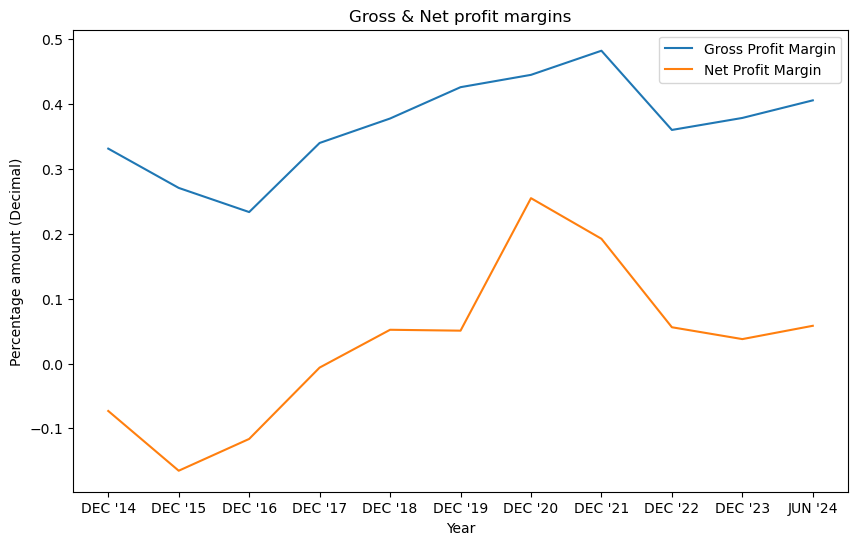

In [88]:
# Displaying 2.
plt.figure(figsize=(10,6))
plt.plot(profit_margins['Year'], profit_margins['gross_profit_margin'], label = 'Gross Profit Margin')
plt.plot(profit_margins['Year'], profit_margins['net_profit_margin'], label = 'Net Profit Margin')
plt.xlabel('Year')
plt.ylabel('Percentage amount (Decimal)')
plt.title('Gross & Net profit margins')
plt.legend()
plt.show()

In [125]:
df = pd.read_sql_query('''
select "Research & Development" as RD, "Net Income", "Gross Income", "EBITDA.1", "Income Statements of AMD" as "Year"
from amd_is
order by "Income Statements of AMD" asc
''', engine)
df.head(5)

,rd,Net Income,Gross Income,EBITDA.1,Year
0,799.128494,-303.819607,1375.858021,287.23393,DEC '14
1,844.965691,-595.173272,974.821677,-147.89154,DEC '15
2,910.325883,-449.286955,902.189902,-303.74329,DEC '16
3,1066.551211,-29.257016,1584.311732,187.06759,DEC '17
4,1212.121503,285.653809,2074.168754,530.62102,DEC '18


In [126]:
df.to_excel("assignm9_3.xlsx", index=False)

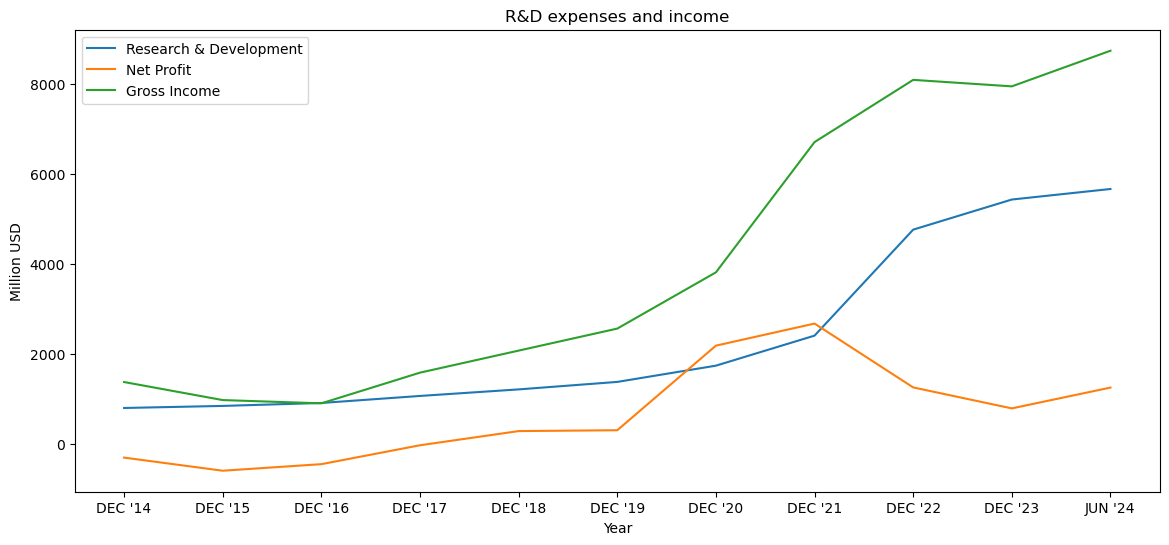

In [87]:
# Displaying 3.
plt.figure(figsize=(14,6))
plt.plot(df['Year'], df["rd"], label = 'Research & Development')
plt.plot(df['Year'], df['Net Income'], label = 'Net Profit')
plt.plot(df['Year'], df['Gross Income'], label = 'Gross Income')
plt.xlabel('Year')
plt.ylabel('Million USD')
plt.title('R&D expenses and income')
plt.legend()
plt.show()

In [127]:
df = pd.read_sql_query('''
select
 ("Research & Development"/"Sales")*100 as rd_of_sales
 ,("EBITDA.1"/"Sales")*100 as ebitda_margin
 ,("EBIT"/"Sales")*100 as ebit_margin
 ,("Research & Development"/"EBITDA.1")*100 as rd_of_ebitda
 ,"Income Statements of AMD" as "Year"
 ,("Cost of Goods Sold (COGS) incl. D&A"/"Sales")*100 as cogs_of_sales
from amd_is
order by "Income Statements of AMD" asc
''', engine)
df.head(5)

,rd_of_sales,ebitda_margin,ebit_margin,rd_of_ebitda,Year,cogs_of_sales
0,19.251725,6.919724,3.232837,278.215214,DEC '14,66.854341
1,23.477825,-4.109246,-8.293661,-571.341465,DEC '15,72.914057
2,23.572097,-7.865168,-10.978464,-299.702385,DEC '16,76.638577
3,22.901199,4.016752,1.275462,570.142167,DEC '17,65.981344
4,22.084942,9.667954,7.042471,228.434505,DEC '18,62.208494


In [128]:
df.to_excel("assignm9_4.xlsx", index=False)

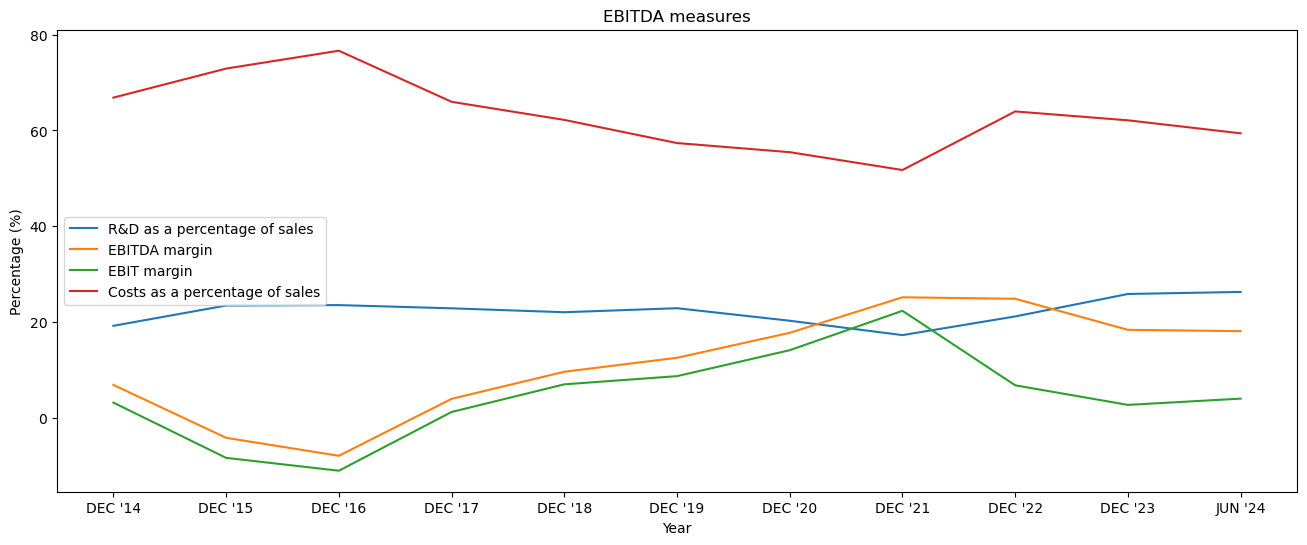

In [98]:
# Displaying 4.
plt.figure(figsize=(16,6))
plt.plot(df['Year'], df["rd_of_sales"], label = 'R&D as a percentage of sales')
plt.plot(df['Year'], df['ebitda_margin'], label = 'EBITDA margin')
plt.plot(df['Year'], df['ebit_margin'], label = 'EBIT margin')
plt.plot(df['Year'], df['cogs_of_sales'], label = 'Costs as a percentage of sales')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('EBITDA measures')
plt.legend()
plt.show()

In [129]:
df = pd.read_sql_query('''
select
 ("EBIT"/("Sales"/"Gross Income"))*100 as roic_estimate
 , ("Sales" - lag("Sales", 1) over (order by "Income Statements of AMD")) / (lag("Sales", 1) over (order by "Income Statements of AMD"))*100 as sales_growth
 ,"Income Statements of AMD" as "Year"
 ,("EBIT" - lag("EBIT", 1) over (order by "Income Statements of AMD")) / (lag("EBIT", 1) over (order by "Income Statements of AMD"))*100 as ebit_growth
from amd_is
order by "Income Statements of AMD" asc
''', engine)
df.head(5)

,roic_estimate,sales_growth,Year,ebit_growth
0,4447.924738,NaN,DEC '14,NaN
1,-8084.840168,-13.296974,DEC '15,-322.431712
2,-9904.659640,7.304381,DEC '16,42.040694
3,2020.728918,20.593756,DEC '17,-114.010404
4,14607.273341,17.849136,DEC '18,550.704866


In [130]:
df.to_excel("assignm9_5.xlsx", index=False)

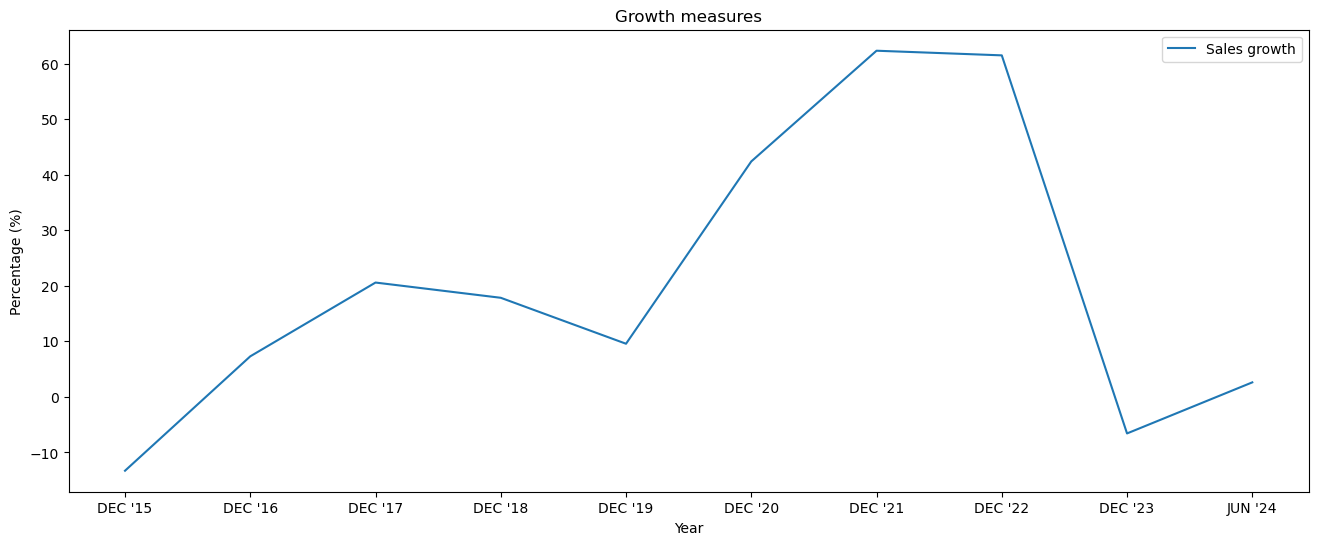

In [108]:
# Displaying 5.
plt.figure(figsize=(16,6))
#plt.plot(df['Year'], df["roic_estimate"], label = 'ROIC estimate')
plt.plot(df['Year'], df['sales_growth'], label = 'Sales growth')
#plt.plot(df['Year'], df['ebit_growth'], label = 'EBIT growth')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Growth measures')
plt.legend()
plt.show()

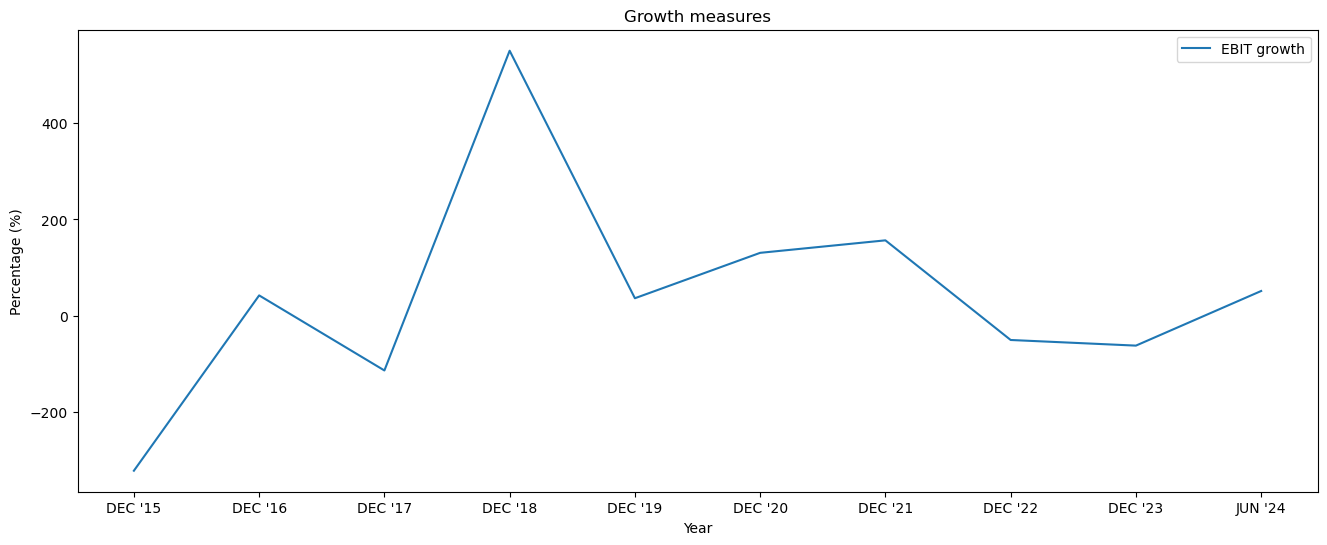

In [109]:
# Displaying 5.
plt.figure(figsize=(16,6))
#plt.plot(df['Year'], df["roic_estimate"], label = 'ROIC estimate')
#plt.plot(df['Year'], df['sales_growth'], label = 'Sales growth')
plt.plot(df['Year'], df['ebit_growth'], label = 'EBIT growth')
plt.xlabel('Year')
plt.ylabel('Percentage (%)')
plt.title('Growth measures')
plt.legend()
plt.show()